# Some fundamentals for tensorflow


---
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors and Numpy
* Using `tf.function`
* Using GPUs And TPUs 



## Introductions to Tensors


In [2]:
# Imort Tensorflow
import tensorflow as tf


print(tf.__version__)

2.4.1


In [3]:
# Create tensors with tf.constant()

scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# View number of tensor dimensions
# `ndim`
scalar.ndim

0

In [5]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
vector.ndim

1

In [7]:
# Create a matrix
matrix = tf.constant([[10,10],
                      [8,8]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [ 8,  8]], dtype=int32)>

In [8]:
matrix.ndim

2

In [9]:
# Create a float matrix
another_matrix = tf.constant([[10. , 8,],
                              [5. , 6.],
                              [9. , 7.]],dtype=tf.float16) 
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  8.],
       [ 5.,  6.],
       [ 9.,  7.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# Lets now create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,17]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 17]]], dtype=int32)>

In [12]:
tensor.ndim

3

#### What we have created so far:
* Scalar: A single number
* Vector: A number with directions
* Matrix: A 2-dimensional array of numbers
* Tensor: A n-dimensional array of numbers

### Creating tensors with `tf.Variable`

In [13]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [14]:
# Lets create a changeable tensor

changeable_tensor = tf.Variable([10,10])

unchangeable_tensor = tf.constant([10,10])

In [15]:
changeable_tensor,unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 10], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>)

In [16]:
# Now lets try changing one of the elements in our changeable tensor

# changeable_tensor[0] = 7 Wont work since is does not support item assignment

changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 7, 10], dtype=int32)>

**Note:** Usually we wont need to decide between `tf.constant` and `tf.Variable` since tensorflow does this on its own.

### Creating Random Tensors

In [17]:
# Lets create 2 random tensors

random_tensor_one = tf.random.Generator.from_seed(42)
random_tensor_one = random_tensor_one.normal(shape=(3,2))

random_tensor_one

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [18]:
random_tensor_two = tf.random.Generator.from_seed(42)
random_tensor_two = random_tensor_two.normal(shape=(3,2))

random_tensor_two

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193765, -1.8107855 ]], dtype=float32)>

In [19]:
random_tensor_one == random_tensor_two

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

### Shuffle the order of elements in a tensor

In [20]:
not_shuffled = tf.constant([[10,7],
                            [3,4],
                            [2,5]])
not_shuffled,not_shuffled.ndim

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>, 2)

In [21]:
# Now lets try to shuffle our `not_shuffled` tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

### Other ways to make tensors


In [22]:
# Create tensor of ones
tf.ones([10,8])

<tf.Tensor: shape=(10, 8), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [23]:
# Create tensor of zeroes
tf.zeros([10,9])

<tf.Tensor: shape=(10, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### We can also turn numpy arrays into tensors

---
Their main difference is that the tensors can be run on a GPU


In [24]:
# Import numpy
import numpy as np

numpy_A = np.arange(1,25,dtype=np.int32) # Create a numpy array between 1 and 25
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

**Note:** 
* `X = tf.constant(some_matrix)` capital for matrices
* `y = tf.constant(vector)` lowercase for vectors

In [25]:
A = tf.constant(numpy_A,shape=(2,3,4))
A

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [26]:
A.ndim

3

## Getting information from tensors

*   List item

*   List item
*   List item


*   List item



* Shape
* Rank
* Axis or dimension
* Size
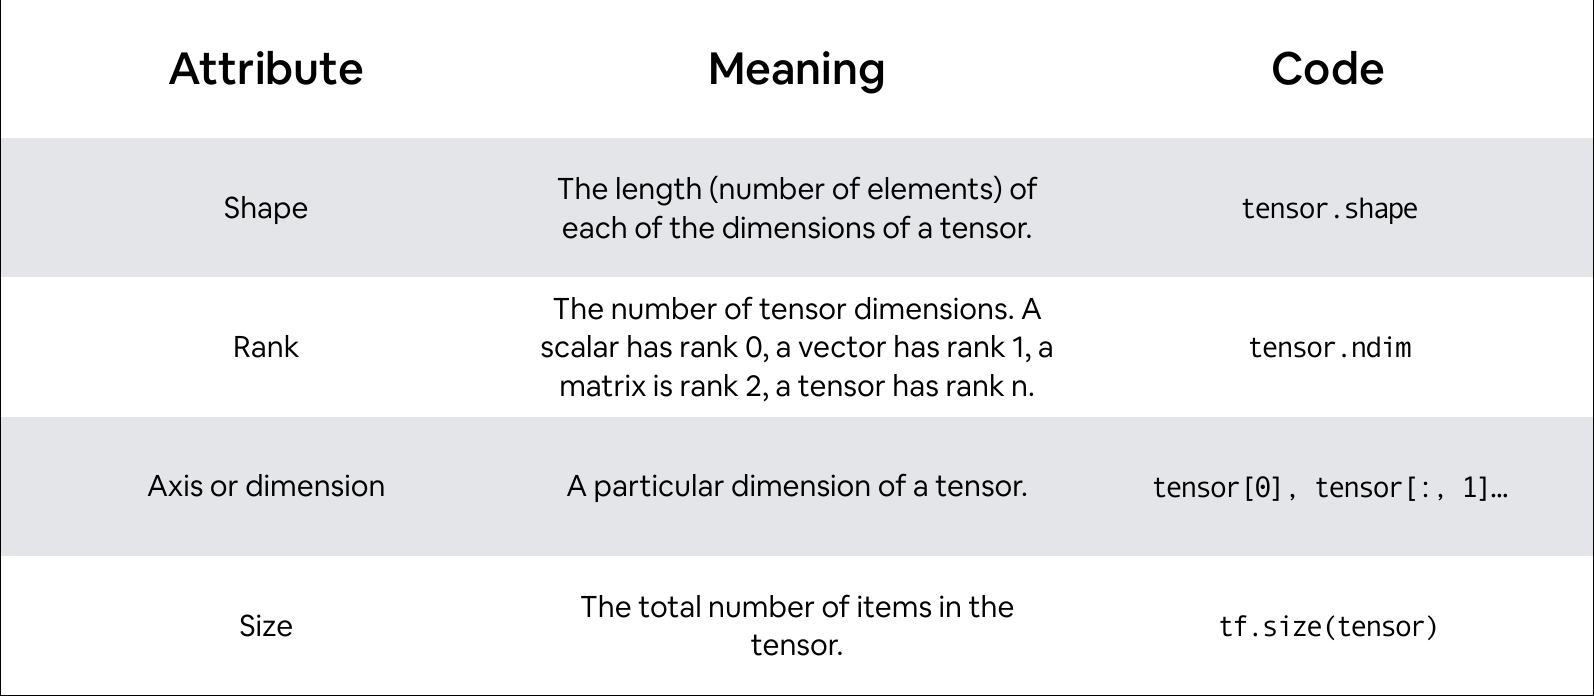

In [27]:
# Create a rank 4 tesor (4 dimensions()

rank_4_tensor = tf.zeros(shape=[2,3,4,5],dtype=tf.int32)
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=int32, numpy=
array([[[[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]],


       [[[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]]]], dtype=int32)>

In [28]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=int32, numpy=
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]], dtype=int32)>

In [29]:
# View shape
print("Shape: ",rank_4_tensor.shape)
# View dimensions
print("Dimensions: ",rank_4_tensor.ndim)
# View tensor size
print("Size: ",tf.size(rank_4_tensor))

Shape:  (2, 3, 4, 5)
Dimensions:  4
Size:  tf.Tensor(120, shape=(), dtype=int32)


In [30]:
# Get various attributes of our tensor
print("Datatype of evey element:",rank_4_tensor.dtype)
print("Number of dimensions: ",rank_4_tensor.ndim)
print("Shape of tensor: ",rank_4_tensor.shape)
print("Elements along the 0 axis:",rank_4_tensor.shape[0])
print("Elements along the last axis:",rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ",tf.size(rank_4_tensor))
print("Total number of elements in our tensor with numpy:",tf.size(rank_4_tensor).numpy())

Datatype of evey element: <dtype: 'int32'>
Number of dimensions:  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor with numpy: 120


### Indexing Tensors

Tensors can be indexed like python lists

In [31]:
# Now lets get the first two elements of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=int32, numpy=
array([[[[0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0]]],


       [[[0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0]]]], dtype=int32)>

In [32]:
# Get the first element for each dimension from each index except the final
rank_4_tensor[:1,:1,:1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=int32, numpy=array([[[[0, 0, 0, 0, 0]]]], dtype=int32)>

In [33]:
# Lets create a rank 2 tensor
rank_2_tensor = tf.constant([[10,7],
                            [3,4]])

rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [34]:
print("Datatype of evey element:",rank_2_tensor.dtype)
print("Number of dimensions: ",rank_2_tensor.ndim)
print("Shape of tensor: ",rank_2_tensor.shape)
print("Elements along the 0 axis:",rank_2_tensor.shape[0])
print("Elements along the last axis:",rank_2_tensor.shape[-1])
print("Total number of elements in our tensor: ",tf.size(rank_2_tensor))
print("Total number of elements in our tensor with numpy:",tf.size(rank_2_tensor).numpy())

Datatype of evey element: <dtype: 'int32'>
Number of dimensions:  2
Shape of tensor:  (2, 2)
Elements along the 0 axis: 2
Elements along the last axis: 2
Total number of elements in our tensor:  tf.Tensor(4, shape=(), dtype=int32)
Total number of elements in our tensor with numpy: 4


In [35]:
# Get the last item of each row
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [36]:
# Add an extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [37]:
tf.expand_dims(rank_2_tensor,axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

In [38]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

## Manipulating Tensors (tensor operations)

**Basic operations**

---


`+` `-` `*` `/`

In [39]:
# We can add values to a tensor using the addition operator

tensor = tf.constant([[10,7],
                     [3,4]])
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [40]:
# Original tensor remains unchanged
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [41]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [42]:
# Subtraction also works
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [43]:
# We can use the tensorflow built in functions aswell
tf.multiply(tensor,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

### Matrix Multiplication


In [44]:
# Μatrix multiplication in tensorflow
print(tensor)

tf.matmul(tensor,tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [45]:
tensor * tensor # Notice the difference

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [46]:
matrix_one = tf.constant([[1,2,5],
                       [7,2,1],
                       [3,3,3]])
matrix_one

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 5],
       [7, 2, 1],
       [3, 3, 3]], dtype=int32)>

In [47]:
matrix_two = tf.constant([[3,5],
                           [6,7],
                           [1,8]])
matrix_two

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 5],
       [6, 7],
       [1, 8]], dtype=int32)>

In [48]:
# matrix_one * matrix_two Wont work due to incompatible shapes
tf.matmul(matrix_one,matrix_two)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [49]:
# Matrix multiplication with Python operator
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [50]:
matrix_one @ matrix_two

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [51]:
# Lets create a 3,2 tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

# Create another 3,2 tensor
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])

In [52]:
# Try to matrix multiply tensors of same shape
# tf.matmul(X,Y) We geet a incompatible size error

**Note** Getting incompatible size errors make sense. Because in order to multiply 2 matrices (tensors) you need the following:
1. The inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions

In [53]:
tf.transpose(Y),Y

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  9, 11],
        [ 8, 10, 12]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [54]:
tf.transpose(X),X

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>)

In [55]:
matrix_mul = tf.matmul(X,tf.transpose(Y))
matrix_mul

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [56]:
tf.matmul(tf.transpose(X),Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [57]:
print("Datatype of evey element:",matrix_mul.dtype)
print("Number of dimensions: ",matrix_mul.ndim)
print("Shape of tensor: ",matrix_mul.shape)
print("Elements along the 0 axis:",matrix_mul.shape[0])
print("Elements along the last axis:",matrix_mul.shape[-1])
print("Total number of elements in our tensor: ",tf.size(matrix_mul))
print("Total number of elements in our tensor with numpy:",tf.size(matrix_mul).numpy())

Datatype of evey element: <dtype: 'int32'>
Number of dimensions:  2
Shape of tensor:  (3, 3)
Elements along the 0 axis: 3
Elements along the last axis: 3
Total number of elements in our tensor:  tf.Tensor(9, shape=(), dtype=int32)
Total number of elements in our tensor with numpy: 9


** The dot product**

Matrix multiplication is also referred to as the dot product.

---


You can perform matrix multiplication using:

* `tf.matmul()`
* `tf.tensordot()`


In [58]:
# Lets perform the dot product on X and Y
# First on transposed X
tf.tensordot(tf.transpose(X),Y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [59]:
 # Secondly on Transposed Y
 tf.tensordot(X,tf.transpose(Y),axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [60]:
# Now lets give it a try on reshaped elements
# First reshape X
tf.tensordot(tf.reshape(X,shape=(2,3)),Y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [61]:
# Seconly on reshaped Y
tf.tensordot(X,tf.reshape(Y,shape=(2,3)),axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [62]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y,"\n")

# Check the reshaped Y
print("Y reshaped to (2,3):")
print(tf.reshape(Y,shape=(2,3)),'\n')

# Check the Transposed Y
print("Transposed Y:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Transposed Y:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [63]:
# Check the values of X, reshape X and transposed X
print("Normal X:")
print(X,"\n")

# Check the reshaped X
print("X reshaped to (2,3):")
print(tf.reshape(X,shape=(2,3)),'\n')

# Check the Transposed X
print("Transposed X:")
print(tf.transpose(X))

Normal X:
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32) 

X reshaped to (2,3):
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) 

Transposed X:
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32)


**Note** That the actuall correct way to multiply tensors is to transpose them.

## Changing the datatype of a tensor

In [64]:
B = tf.constant([1.7,7.4])
B

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>

In [65]:
C = tf.constant([7,10])
C

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

**Note** In tensorflow the default precision is 32 bit

In [66]:
# Chaning the tf.float32 to tf.float16 (reduced precision)
D = tf.cast(B,dtype=tf.float16)
D

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [67]:
# Change from int32 to flaot32
E = tf.cast(C,dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

### Aggregating Tensors

Aggregating tensors means condesing them from multiple values down to smaller amount of values

In [68]:
D = tf.constant([-7,-19])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -19], dtype=int32)>

In [69]:
# Get the absolute values
D = tf.cast(D,dtype=tf.float16)

tf.abs(D)

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 19.], dtype=float16)>

**Forms of aggregation**

---
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor


In [70]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0,100,size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([22, 18,  1, 75, 88, 47, 55,  5, 64, 95,  5, 61, 19, 84, 91, 15, 25,
       10, 70,  8, 19, 69, 97, 88, 15,  9, 31, 34, 98, 99, 37, 62, 96, 11,
       80, 70, 74, 82, 17, 82, 75, 89, 79, 32, 58,  9, 57, 44, 15, 39])>

In [71]:
print("Datatype of evey element:",E.dtype)
print("Number of dimensions: ",E.ndim)
print("Shape of tensor: ",E.shape)
print("Elements along the 0 axis:",E.shape[0])
print("Elements along the last axis:",E.shape[-1])
print("Total number of elements in our tensor: ",tf.size(E))
print("Total number of elements in our tensor with numpy:",tf.size(E).numpy())

Datatype of evey element: <dtype: 'int64'>
Number of dimensions:  1
Shape of tensor:  (50,)
Elements along the 0 axis: 50
Elements along the last axis: 50
Total number of elements in our tensor:  tf.Tensor(50, shape=(), dtype=int32)
Total number of elements in our tensor with numpy: 50


In [72]:
# Find the minimum 
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [73]:
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [74]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [75]:
# FInd the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2525>

In [76]:
# To find the variance we need tensorflow probability
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1015>

In [77]:
# find standart deviation
# In order for tf.math.reduce to work we need to cast the int tensor into a float
E = tf.cast(E,dtype=tf.float16)
E

<tf.Tensor: shape=(50,), dtype=float16, numpy=
array([22., 18.,  1., 75., 88., 47., 55.,  5., 64., 95.,  5., 61., 19.,
       84., 91., 15., 25., 10., 70.,  8., 19., 69., 97., 88., 15.,  9.,
       31., 34., 98., 99., 37., 62., 96., 11., 80., 70., 74., 82., 17.,
       82., 75., 89., 79., 32., 58.,  9., 57., 44., 15., 39.],
      dtype=float16)>

In [78]:
# Variance
tf.math.reduce_variance(E)

<tf.Tensor: shape=(), dtype=float16, numpy=1015.0>

In [79]:
# Standard Deviation
tf.math.reduce_std(E)

<tf.Tensor: shape=(), dtype=float16, numpy=31.86>

### Lets find the positional max and min 
`tf.math.argmax`,`tf.math.argmin`

In [80]:
# Lets create a new tensor to find argmax and argmin
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [81]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [82]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [83]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [84]:
# Check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [85]:
# Find the positional minumum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [86]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [87]:
tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

In [88]:
F[tf.argmin(F)] == tf.reduce_min(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

### Squeezing a tensor (removing all single dimension)

In [89]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]),shape=[1,1,1,1,50])
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [90]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

## One hot encoding tensors

In [91]:
# Lets create a list of indices
some_list = [0,1,2,3]


# One hot encode our list of indices
# One hot encoding with tf requires the depth of the list
depth = len(some_list)

tf.one_hot(some_list,depth)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [92]:
# Specifu custom values for one hot encoding
tf.one_hot(some_list,depth=4,on_value="True",off_value="False")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'True', b'False', b'False', b'False'],
       [b'False', b'True', b'False', b'False'],
       [b'False', b'False', b'True', b'False'],
       [b'False', b'False', b'False', b'True']], dtype=object)>

### Squaring , log,square root

In [94]:
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [95]:
# Lets square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [97]:
# Find the square root( it requires not int type)
tf.math.sqrt(tf.cast(H,dtype=tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ],
      dtype=float16)>

In [99]:
# Find the log
tf.math.log(tf.cast(H,dtype=tf.float16))

<tf.Tensor: shape=(9,), dtype=float16, numpy=
array([0.    , 0.6934, 1.099 , 1.387 , 1.609 , 1.792 , 1.946 , 2.08  ,
       2.197 ], dtype=float16)>

## Tensors and Numpy

Tensorflow interacts with Numpy arrays

In [101]:
# Create a tensor directly from numpy array
J = tf.constant(np.array([3.,7.,10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [103]:
# Convert our tensor back to a numpy array
np.array(J),type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [105]:
# The default types of each are different
numpy_J = tf.constant(np.array([3.,7.,10.]))
tensor_J = tf.constant([3.,7.,10.])

# Check the datatyoes of each tensor
numpy_J.dtype,tensor_J.dtype

(tf.float64, tf.float32)

### Main difference between tensorflow and numpy


---
Tensorflow can be run on a gpu or tpu while numpy only runs on the cpu which is much slower



In [109]:
# Find out whether you are running on cpu or gpu
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [110]:
!nvidia-smi

Sun May  9 21:50:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    35W /  70W |    224MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Note** If you have a cuda-enabled GPU, tensorflow will automatically use it when possible.